# CS 4661: Introduction to Data Science
## Jay Tandel


### Problem:  predict the probability of Heart Disease 

## A
In this question, we work with a simplified version of Heart dataset. Read the dataset file “Heart_short.csv” from github, and assign it to a Pandas DataFrame:

df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")

In [1]:
# Importing the required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample 
from statistics import mode
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics

In [2]:
# Reading the csv file from web, and store it in panda DataFrame
df = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")

In [3]:
#print the imported dataset
print(df)

     Age  RestBP  Chol  RestECG  MaxHR  Oldpeak  AHD
0     63     145   233        2    150      2.3   No
1     67     160   286        2    108      1.5  Yes
2     67     120   229        2    129      2.6  Yes
3     37     130   250        0    187      3.5   No
4     41     130   204        2    172      1.4   No
..   ...     ...   ...      ...    ...      ...  ...
276   45     110   264        0    132      1.2  Yes
277   68     144   193        0    141      3.4  Yes
278   57     130   131        0    115      1.2  Yes
279   57     130   236        2    174      0.0  Yes
280   38     138   175        0    173      0.0   No

[281 rows x 7 columns]


## B
Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [4]:
# Creating the Feature Matrix for the dataset:

# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak']

# use the above list to select the features from the original DataFrame
X = df[feature_cols] 

print(X)

     Age  RestBP  Chol  RestECG  MaxHR  Oldpeak
0     63     145   233        2    150      2.3
1     67     160   286        2    108      1.5
2     67     120   229        2    129      2.6
3     37     130   250        0    187      3.5
4     41     130   204        2    172      1.4
..   ...     ...   ...      ...    ...      ...
276   45     110   264        0    132      1.2
277   68     144   193        0    141      3.4
278   57     130   131        0    115      1.2
279   57     130   236        2    174      0.0
280   38     138   175        0    173      0.0

[281 rows x 6 columns]


In [5]:
# select label (the last column) from the DataFrame
y = df['AHD']

print(y)

0       No
1      Yes
2      Yes
3       No
4       No
      ... 
276    Yes
277    Yes
278    Yes
279    Yes
280     No
Name: AHD, Length: 281, dtype: object


In [6]:
# Normalize the feature matrix
X = preprocessing.scale(X)
print(X)

X = pd.DataFrame(X, columns=feature_cols)
print(X.head())

[[ 0.94788279  0.74978425 -0.25859799  1.04743633 -0.00919313  1.13182982]
 [ 1.38542704  1.59842565  0.75330422  1.04743633 -1.84813139  0.43550978]
 [ 1.38542704 -0.6646181  -0.33496796  1.04743633 -0.92866226  1.39294984]
 ...
 [ 0.29156641 -0.09885716 -2.20603242 -0.96851989 -1.54164168  0.17438976]
 [ 0.29156641 -0.09885716 -0.2013205   1.04743633  1.04162873 -0.8700903 ]
 [-1.78676878  0.35375159 -1.36596267 -0.96851989  0.99784448 -0.8700903 ]]
        Age    RestBP      Chol   RestECG     MaxHR  Oldpeak
0  0.947883  0.749784 -0.258598  1.047436 -0.009193  1.13183
1  1.385427  1.598426  0.753304  1.047436 -1.848131  0.43551
2  1.385427 -0.664618 -0.334968  1.047436 -0.928662  1.39295
3 -1.896155 -0.098857  0.065974 -0.968520  1.610824  2.17631
4 -1.458611 -0.098857 -0.812280  1.047436  0.954060  0.34847


## C
Split the dataset into testing and training sets with the following parameters: test_size=0.25, random_state=3.

In [7]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [8]:
# print the training set:
print(X_train)
print('\n')
print(y_train)

          Age    RestBP      Chol   RestECG     MaxHR  Oldpeak
89   0.182180 -0.381738  0.046882  1.047436 -0.271899  0.17439
57  -0.692908 -0.098857 -0.029488  1.047436  1.304334 -0.69601
132  1.057269 -0.664618 -0.010396  1.047436 -2.373542  1.04479
30   1.604199  0.466904 -0.144043 -0.968520  0.034591  0.69663
260  0.072794 -0.212009 -0.793188  0.039458 -0.884878  0.87071
..        ...       ...       ...       ...       ...      ...
147 -1.021066 -1.117227 -1.652350 -0.968520 -0.534604 -0.87009
256  0.291566  1.258969 -0.277690  1.047436  0.603786 -0.87009
131  0.072794  1.598426  0.810582  1.047436 -0.228114 -0.17377
249  1.276041  1.598426 -0.354060  1.047436 -0.534604  1.13183
152  1.057269  0.749784 -0.659540  1.047436 -0.797310  0.87071

[210 rows x 6 columns]


89     Yes
57      No
132    Yes
30      No
260    Yes
      ... 
147     No
256    Yes
131    Yes
249     No
152    Yes
Name: AHD, Length: 210, dtype: object


In [9]:
# print the testing set:
print(X_test)
print('\n')
print(y_test)

          Age    RestBP      Chol   RestECG     MaxHR  Oldpeak
253  1.057269  2.164187 -0.373153  1.047436  0.209728 -0.34785
74   0.510339 -1.230379 -0.144043  1.047436 -0.359467  0.17439
230  1.057269 -0.212009  0.314177 -0.968520 -1.979484 -0.69601
38   0.072794  0.014295  2.032501 -0.968520 -0.797310  0.17439
16  -0.692908 -1.230379 -0.334968 -0.968520  0.778923  0.00031
..        ...       ...       ...       ...       ...      ...
15   0.291566  1.032665 -1.499610 -0.968520  1.041629  0.52255
78  -1.021066 -0.947499  0.256899  1.047436  1.523255 -0.87009
109 -0.364750 -2.135597 -0.373153 -0.968520  0.165944 -0.87009
122  0.400952 -1.513260 -0.124951  1.047436  0.165944 -0.34785
142 -0.692908 -0.438314  0.161437 -0.968520  1.085413 -0.87009

[71 rows x 6 columns]


253     No
74     Yes
230     No
38     Yes
16     Yes
      ... 
15      No
78      No
109     No
122     No
142     No
Name: AHD, Length: 71, dtype: object


## D
Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.
 
Now, Use Logistic Regression Classifier to predict the probability of Heart Disease based on the training/testing datasets that you built in part (c) (you have to use “my_logreg.predict_proba” method rather than “my_logreg.predict”). Then, Plot the Roc Curve for this classifier, and also Compute the AUC (Area Under Curve for ROC).

In [10]:
# Instantiate my_logisticregression object of LogisticRegression class
my_logisticregression = LogisticRegression()

# Training the model with train dataset
my_logisticregression.fit(X_train, y_train)

# Testing the model with test dataset we created using split

# store the predicted values
my_logisticregression_y_predict = my_logisticregression.predict(X_test)

# Calculating the Accuracy of the prediction 

# we use accuracy_score function
my_logisticregression_accuracy = accuracy_score(y_test, my_logisticregression_y_predict)

print('Accuracy using Logistic Regression is: ',my_logisticregression_accuracy)

Accuracy using Logistic Regression is:  0.7183098591549296


In [11]:
# Predicting the Binary Label:
y_predict_lr = my_logisticregression.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logisticregression.predict_proba(X_test)

In [18]:
# This line prints the "actual label" of the testing set:
print(y_test)

253     No
74     Yes
230     No
38     Yes
16     Yes
      ... 
15      No
78      No
109     No
122     No
142     No
Name: AHD, Length: 71, dtype: object


In [19]:
# This line prints the "predicted label" for the testing set:
print(y_predict_lr)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']


In [20]:
# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

[[0.49847189 0.50152811]
 [0.55153223 0.44846777]
 [0.39514152 0.60485848]
 [0.39636475 0.60363525]
 [0.8463285  0.1536715 ]
 [0.77042084 0.22957916]
 [0.73485372 0.26514628]
 [0.86548609 0.13451391]
 [0.35529864 0.64470136]
 [0.6707959  0.3292041 ]
 [0.09558374 0.90441626]
 [0.91924811 0.08075189]
 [0.29096442 0.70903558]
 [0.43043601 0.56956399]
 [0.66808153 0.33191847]
 [0.85924791 0.14075209]
 [0.11598482 0.88401518]
 [0.68324451 0.31675549]
 [0.11239963 0.88760037]
 [0.33485811 0.66514189]
 [0.85412798 0.14587202]
 [0.86376748 0.13623252]
 [0.22496489 0.77503511]
 [0.92910529 0.07089471]
 [0.10918691 0.89081309]
 [0.57443365 0.42556635]
 [0.72926897 0.27073103]
 [0.43211917 0.56788083]
 [0.67752917 0.32247083]
 [0.77600088 0.22399912]
 [0.30112704 0.69887296]
 [0.10864797 0.89135203]
 [0.17558051 0.82441949]
 [0.89158205 0.10841795]
 [0.81006702 0.18993298]
 [0.01129614 0.98870386]
 [0.06726456 0.93273544]
 [0.73258706 0.26741294]
 [0.20480859 0.79519141]
 [0.51449134 0.48550866]


In [21]:
# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

[0.50152811 0.44846777 0.60485848 0.60363525 0.1536715  0.22957916
 0.26514628 0.13451391 0.64470136 0.3292041  0.90441626 0.08075189
 0.70903558 0.56956399 0.33191847 0.14075209 0.88401518 0.31675549
 0.88760037 0.66514189 0.14587202 0.13623252 0.77503511 0.07089471
 0.89081309 0.42556635 0.27073103 0.56788083 0.32247083 0.22399912
 0.69887296 0.89135203 0.82441949 0.10841795 0.18993298 0.98870386
 0.93273544 0.26741294 0.79519141 0.48550866 0.282992   0.69413125
 0.33667486 0.17922533 0.96610847 0.66271057 0.12528777 0.14343511
 0.63172735 0.40237782 0.37035602 0.80530746 0.03913305 0.76936798
 0.11167265 0.19466654 0.11244591 0.3568092  0.16280918 0.22948696
 0.72249443 0.17159489 0.23296984 0.33753157 0.24405164 0.12456215
 0.30484273 0.07298196 0.09408331 0.22991179 0.08301102]


In [15]:
# True Positive Rate (TPR) and False Positive Rate (FPR):
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label='Yes')

print(fpr)
print(tpr)

[0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146
 0.2195122  0.2195122  0.29268293 0.29268293 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561
 0.68292683 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732
 1.        ]
[0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.4        0.4        0.53333333 0.53333333 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]


In [22]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print("AUC is: ", AUC)

AUC is:  0.7650406504065042


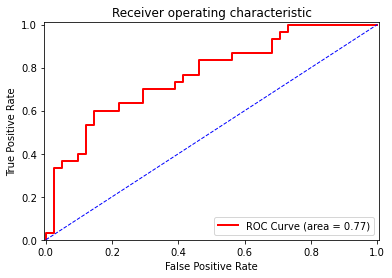

In [17]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Answer Summary

### D
#### Accuracy using Logistic Regression is:  0.7183098591549296
#### AUC is:  0.7650406504065042